# <span style="color:blue">EVAC Workshop 1: Introduction to GAs in DEAP</span>

**Module leader**

Simon O'Keefe: simon.okeefe@york.ac.uk

**Graduate Teaching Assistants**

Danny Roberts: danny.roberts@york.ac.uk

Tianda Sun: tianda.sun@york.ac.uk

## <span style="color:#0073e6">Prerequisites</span>

Before participating in this practical make sure that you have watched the pre-wrokshop materials:
- Lectures 1, 2a and 2b
- Code walkthroughs 1 and 2

# Colab Packages Install

## <span style="color:#0073e6">Learning objectives</span>

- To gain familiarity with the DEAP toolbox for Python
- To understand how to code a simple GA
- To understand crossover, selection, representation, and fitness functions
- To appreciate how algorithm parameterization can affect performance

# <span style="color:blue">Practical Instructions</span>

Below is a max-ones problem implementation (mentioned in the walkthrough) along with a simple GA solution in DEAP. Run the problem and examine the results. Then follow the exercises that follow the code.

# <span style="color:blue">Max Ones implementation</span>

In [2]:
import random
import numpy
import matplotlib.pyplot as plt
from deap import base, creator, tools

In [3]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()

toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return (sum(individual),)

toolbox.register("evaluate", evalOneMax)
toolbox.register("select", tools.selTournament, tournsize=3)

toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.01)

In [4]:
logbook = tools.Logbook()
stats = tools.Statistics(key=lambda ind: ind.fitness.values)
stats.register("avg", numpy.mean)
stats.register("std", numpy.std)
stats.register("min", numpy.min)
stats.register("max", numpy.max)

In [5]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit

In [6]:
NGEN = 100
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
         ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

In [7]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")

Text(0, 0.5, 'Mean Fitness')

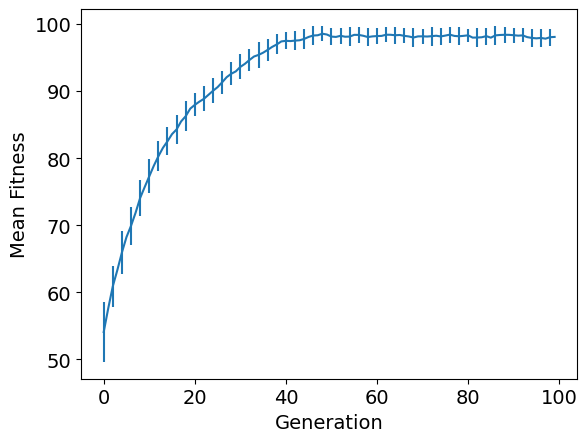

In [8]:
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [9]:
print(logbook)

gen	avg  	std     	min	max
0  	54.08	4.46022 	43 	64 
1  	57.62	3.93645 	49 	66 
2  	60.9 	3.08383 	54 	69 
3  	63.32	3.24    	56 	70 
4  	65.94	3.2429  	56 	73 
5  	68.23	2.60712 	62 	75 
6  	69.91	2.81103 	63 	77 
7  	71.86	2.79292 	66 	79 
8  	74.06	2.74525 	66 	82 
9  	75.69	2.48473 	70 	83 
10 	77.28	2.54197 	72 	84 
11 	78.86	2.48604 	72 	84 
12 	80.27	2.23094 	75 	85 
13 	81.53	2.07584 	76 	85 
14 	82.51	2.07603 	77 	87 
15 	83.58	1.82855 	78 	88 
16 	84.28	2.19581 	78 	89 
17 	85.48	1.88404 	80 	90 
18 	86.25	2.24221 	79 	91 
19 	87.38	1.75943 	83 	91 
20 	87.94	1.71942 	84 	93 
21 	88.42	1.77865 	84 	93 
22 	88.84	1.86933 	84 	93 
23 	89.44	1.75111 	84 	94 
24 	90.04	1.85429 	83 	94 
25 	90.58	2.0009  	84 	95 
26 	91.3 	1.69411 	86 	95 
27 	92.07	1.95067 	84 	97 
28 	92.58	1.71569 	88 	96 
29 	92.93	1.83986 	87 	97 
30 	93.6 	1.86548 	89 	99 
31 	94.06	1.81008 	89 	98 
32 	94.63	1.67126 	91 	98 
33 	95.15	1.65151 	91 	99 
34 	95.39	1.90733 	90 	100
35 	95.72	1.70927 	92 	99 
3

In [10]:
print(tools.selBest(pop, 1))

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]


# <span style="color:blue">Exercise 1: Getting to know the GA</span>

- Try playing with the crossover and mutation probabilities. Can you tweak these parameters to improve performance? Why does the performance improve / not improve / get worse?

- Change the line that creates the fitness class, change weights=(1.0,) to weights=(-1.0,)). This changes the problem from a maximization problem to a minimization problem. What effect does this have?

In [11]:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("IndividualMin", list, fitness=creator.FitnessMin)
toolbox.register("individualMin", tools.initRepeat, creator.IndividualMin, toolbox.attr_bool, n=100)
toolbox.register("population", tools.initRepeat, list, toolbox.individualMin)

In [12]:
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

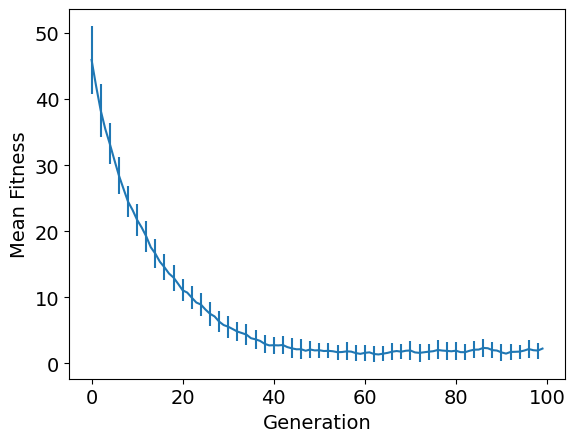

In [13]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [14]:
print(tools.selBest(pop, 1))

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]


- This code currently using two-point crossover to combine the genomes of selected parents to produce offspring. This produces offspring by selecting two random positions on the genome, and swapping values between these two positions. Uniform crossover randomly swaps values at each location in the genome with a given probability. Let’s begin customizing our algorithm using uniform crossover instead. Find the definition of the crossover operator, which has been registered in the toolbox as the function ‘mate’. Now change the operator (you can use the Library Reference to find the built-in command for this). Run the program.

You might see the following error:  

``TypeError: cxUniform() takes exactly 3 arguments (2 given)``  

A quick look at the documentation for the cxUniform function will show you that this is because the new crossover function takes an extra argument: the probability of a swap at each position (locus) in the genome. Find the part of the code where mating occurs and pass the toolbox.mate command the extra parameter value (say 0.1). Alternatively, you can define the comment when you register cxUnifrom as “mate”. Now your code will run.


# <span style="color:blue">Exercise 2: Implement a Real Valued Version</span>

Modify the code so that instead of counting binary 1s, the problem is to maximize the total value of genes whose values are real numbers between 0 and 1, inclusive. For example [0.5, 0.2, 0.1, 0.3] would give a fitness value of 1.1.

In [15]:
toolbox.register("attr_real", random.random)
toolbox.register("individual_real", tools.initRepeat, creator.Individual, toolbox.attr_real, n=100)
toolbox.register("population_real", tools.initRepeat, list, toolbox.individual_real)

pop = toolbox.population_real(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

Text(0, 0.5, 'Mean Fitness')

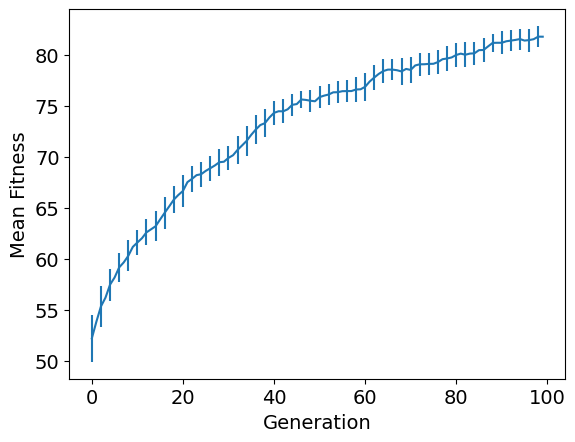

In [16]:
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")

In [17]:
print(tools.selBest(pop, 1))

[[0.8720414328268277, 0.9718810263783154, 0.44953084372291074, 1.0, 0.7066188168318732, 1.0, 1.0, 0.8252722635609887, 0.5649101214788671, 0.9513188751094943, 1.0, 1.0, 0.9214996151235982, 0.9980421435797465, 0.9605414108249863, 0.7850794719743857, 0.990749908892435, 0.8900047343709514, 0.8204426057551184, 0.8969017988172736, 0.6800294180951738, 0.9303357613879522, 1.0, 0.9391602202954438, 0.6756001548567784, 0.8618081879892836, 0.9003782444630213, 1.0, 0.8325831750917182, 1.0, 0.9498102372826472, 0.692972771242124, 0.8260701692773239, 0.8190596976994108, 0.5922089569165497, 0.602240794410463, 0.6252709132089855, 0.6521200706126729, 0.8771919774181716, 0.7195501369263971, 0.8142576864064183, 0.953625187293408, 0.4816031446143352, 1.0, 0.8569576306641835, 0.9440324065215182, 0.5880758788221482, 0.5421821390291848, 1.0, 0.7193107518378821, 0.5612667384931126, 1.0, 0.6789509359341316, 1.0, 0.9210670914231451, 0.9419797476683045, 1.0, 0.5269110816494014, 0.7737422466416388, 0.44006473539960

# <span style="color:blue">Exercise 3: Write your own operator</span>

Let’s write our own mutation operator and register it in the toolbox.  Implement a uniform operator for the real valued version that replaces each value in the genome with a random uniform number between 0 and 1 using a fixed mutation probability per gene, or that adds a float number to the gene.
To do this, you need to write your own Python function that takes in an individual, and anything else you need (e.g. probability of mutation per gene) and modifies the individual. The function should return a tuple, with the individual as the first element  e.g. return individual,

In [18]:
def my_mutate(individual, indpb = 0.2):
    return ([random.random() if random.random() > indpb else gene for gene in individual ],)

toolbox.register("customMutate", my_mutate, indpb=0.2)

In [19]:
toolbox.register("attr_real", random.random)
toolbox.register("individual_real", tools.initRepeat, creator.Individual, toolbox.attr_real, n=100)
toolbox.register("population_real", tools.initRepeat, list, toolbox.individual_real)

pop = toolbox.population_real(n=100)
fitnesses = list(map(toolbox.evaluate, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit


NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.customMutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluate, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

[[0.5596671748849261, 0.9652340236474003, 0.44336351141006314, 0.8149509486368107, 0.4302427065157397, 0.48491466994944765, 0.7235500243946668, 0.8135193015112752, 0.9462646591321894, 0.9489812376306588, 0.8315951567378588, 0.9801128934481665, 0.8289052688750301, 0.5223012361787301, 0.6366184220571981, 0.9102409003773194, 0.9569989925737264, 0.9810956149383591, 0.865599460157944, 0.977403668641145, 0.7268836290346363, 0.7500054239965599, 0.8042848333653161, 0.8568445863060098, 0.8973476511788856, 0.8906956844997689, 0.7706490654955441, 0.36992046878975604, 0.6575236142411552, 0.9081305299211904, 0.559609677254295, 0.9377658176094195, 0.6579321902929021, 0.5839409273978245, 0.9081663970667581, 0.7891888510750514, 0.9839990883007463, 0.9992184870803296, 0.5815092625771241, 0.9503040833994363, 0.8835905023043558, 0.9533442388485827, 0.7210998775779109, 0.9774317939276539, 0.6110280679387803, 0.7897614694241021, 0.7772172597086878, 0.9624532292270087, 0.19028369029231496, 0.544518859267334

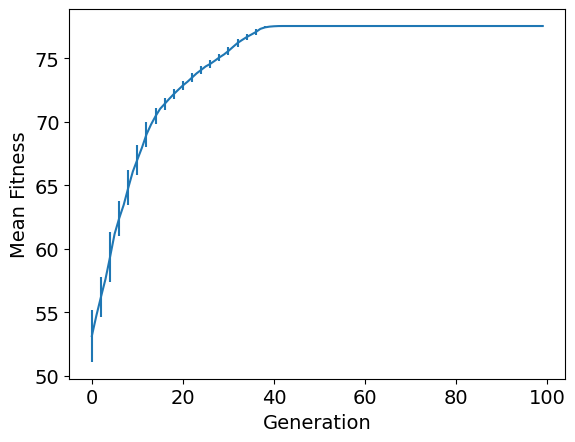

In [20]:
    logbook.record(gen=g, **record)
logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")
print(tools.selBest(pop, 1))

# <span style="color:blue">Exercise 4: Change the problem to a ‘deceptive’ problem</span>

This exercise will test your understanding of the principles in this practical and teach you about the impact of choices of representation.

First, revert back to the original Max Ones code. Now modify the Max Ones problem to implement the following ‘deceptive’ problem. A deceptive problem is just a problem that has local optima in which the algorithm can become trapped. Note that the standard Max Ones problem only has a global optimum.

In this problem, the bit string should be split into six blocks of three bits, where each block is assigned a partial fitness based on the number of ones in that block. Here is an example individual:

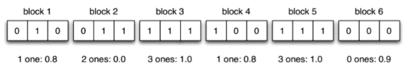

The fitness for each block of three is given as follows:
- 0 ones: partial fitness 0.9
- 1 ones: partial fitness 0.8
- 2 ones: partial fitness 0.0
- 3 ones: partial fitness 1.0

The fitness of the entire string is then determined by calculating the summed value over all blocks. For example, the individual above has a fitness of:  
``(0.8 + 0.0 + 1.0 + 0.8 + 1.0 + 0.9) = 4.5``

**Your task: Set the length of the individuals to 18 and implement this problem.**

In [21]:
def eval_blocks(individual: list) -> tuple:
    return (sum(map(lambda x: [0.9, 0.8, 0.0, 1.0][sum(x)], [individual[i:i + 3] for i in range(0, len(individual), 3)] )), )
print(eval_blocks([0,1,0,0,1,1,1,1,1,1,0,0,1,1,1,0,0,0]))

(4.5,)


-- Generation 0 --
-- Generation 1 --
-- Generation 2 --
-- Generation 3 --
-- Generation 4 --
-- Generation 5 --
-- Generation 6 --
-- Generation 7 --
-- Generation 8 --
-- Generation 9 --
-- Generation 10 --
-- Generation 11 --
-- Generation 12 --
-- Generation 13 --
-- Generation 14 --
-- Generation 15 --
-- Generation 16 --
-- Generation 17 --
-- Generation 18 --
-- Generation 19 --
-- Generation 20 --
-- Generation 21 --
-- Generation 22 --
-- Generation 23 --
-- Generation 24 --
-- Generation 25 --
-- Generation 26 --
-- Generation 27 --
-- Generation 28 --
-- Generation 29 --
-- Generation 30 --
-- Generation 31 --
-- Generation 32 --
-- Generation 33 --
-- Generation 34 --
-- Generation 35 --
-- Generation 36 --
-- Generation 37 --
-- Generation 38 --
-- Generation 39 --
-- Generation 40 --
-- Generation 41 --
-- Generation 42 --
-- Generation 43 --
-- Generation 44 --
-- Generation 45 --
-- Generation 46 --
-- Generation 47 --
-- Generation 48 --
-- Generation 49 --
-- Generat

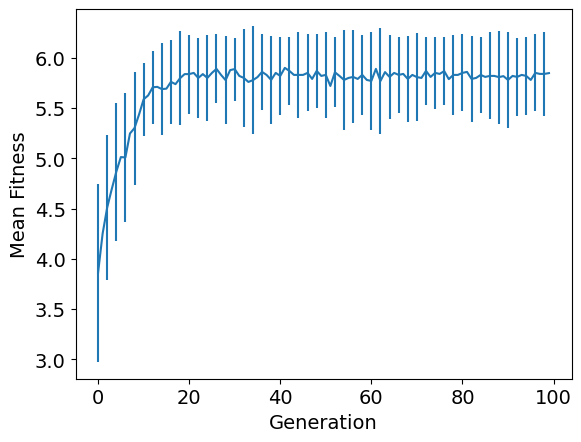

In [22]:
toolbox.register("evaluateBlocks", eval_blocks)
toolbox.register("individual_18", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=18)
toolbox.register("population", tools.initRepeat, list, toolbox.individual_18)
pop = toolbox.population(n=100)
fitnesses = list(map(toolbox.evaluateBlocks, pop))
for ind, fit in zip(pop, fitnesses):
    ind.fitness.values = fit
NGEN = 100
logbook.clear()
for g in range(NGEN):
    print("-- Generation %i --" % g)

    offspring = toolbox.select(pop, len(pop))
    offspring = list(map(toolbox.clone, offspring))

    for child1, child2 in zip(offspring[::2], offspring[1::2]):
        toolbox.mate(child1, child2)
        del child1.fitness.values
        del child2.fitness.values

    for mutant in offspring:
        toolbox.mutate(mutant)
        del mutant.fitness.values

    invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
    fitnesses = map(toolbox.evaluateBlocks, invalid_ind)
    for ind, fit in zip(invalid_ind, fitnesses):
        ind.fitness.values = fit

    pop[:] = offspring

    record = stats.compile(pop)
    logbook.record(gen=g, **record)

logbook.header = "gen", "avg", "std", "min", "max"
gen = logbook.select("gen")
avgs = logbook.select("avg")
stds = logbook.select("std")
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('legend', fontsize=14)
fig, ax1 = plt.subplots()
#line1 = ax1.plot(gen, avgs)
line1 = ax1.errorbar(gen, avgs, yerr=stds, errorevery=2)
ax1.set_xlabel("Generation")
ax1.set_ylabel("Mean Fitness")
print(tools.selBest(pop, 1))

<span style="color:green">Questions to think about:  </span>
- <span style="color:green">What is it about this fitness landscape that makes it (for some algorithms) difficult to traverse?  </span>
- <span style="color:green">What is the global optimum for this problem? What do you think the fitness landscape looks like?  </span>
- <span style="color:green">Run the algorithm multiple times. Do you get the same result each time?  </span>
- <span style="color:green">Does your algorithm find the global optimum? Why?  </span>
- <span style="color:green">Can you improve the result by changing parameters or operators?</span>

# <span style="color:blue">Exercise 5: Multiple runs</span>

Genetic algorithms are stochastic. As such, you might get a different result every time you run it; sometimes, for example, getting stuck on local optima and sometimes now. Try to modify the algorithm to run 50 times. Then record and plot a distribution of the final mean fitness scores. The matplotlib code for a density plot is:  

```plt.hist(avgRuns, density=True, bins=10)```  
(You might need to change the number of bins).

In [23]:
fitness_hist = []
for i in range(50):
    print(f"Run number {i}")
    pop = toolbox.population(n=100)
    fitnesses = list(map(toolbox.evaluateBlocks, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit
    NGEN = 100
    logbook.clear()
    for g in range(NGEN):
        #print("-- Generation %i --" % g)

        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            toolbox.mate(child1, child2)
            del child1.fitness.values
            del child2.fitness.values

        for mutant in offspring:
            toolbox.mutate(mutant)
            del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluateBlocks, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit
    fitness_hist.append(toolbox.evaluateBlocks(tools.selBest(pop, 1)[0])[0])


Run number 0
Run number 1
Run number 2
Run number 3
Run number 4
Run number 5
Run number 6
Run number 7
Run number 8
Run number 9
Run number 10
Run number 11
Run number 12
Run number 13
Run number 14
Run number 15
Run number 16
Run number 17
Run number 18
Run number 19
Run number 20
Run number 21
Run number 22
Run number 23
Run number 24
Run number 25
Run number 26
Run number 27
Run number 28
Run number 29
Run number 30
Run number 31
Run number 32
Run number 33
Run number 34
Run number 35
Run number 36
Run number 37
Run number 38
Run number 39
Run number 40
Run number 41
Run number 42
Run number 43
Run number 44
Run number 45
Run number 46
Run number 47
Run number 48
Run number 49


You should see that, for this problem, there's no a lot of variation. But this is unusual with harder problems.

(array([ 2.        ,  0.        ,  0.        ,  5.33333333,  0.        ,
         0.        , 10.        ,  0.        ,  0.        ,  0.66666667,
         9.33333333,  0.        ,  0.        ,  2.66666667,  0.        ,
         0.        ,  2.        ,  0.        ,  0.        ,  1.33333333]),
 array([5.2 , 5.23, 5.26, 5.29, 5.32, 5.35, 5.38, 5.41, 5.44, 5.47, 5.5 ,
        5.53, 5.56, 5.59, 5.62, 5.65, 5.68, 5.71, 5.74, 5.77, 5.8 ]),
 <BarContainer object of 20 artists>)

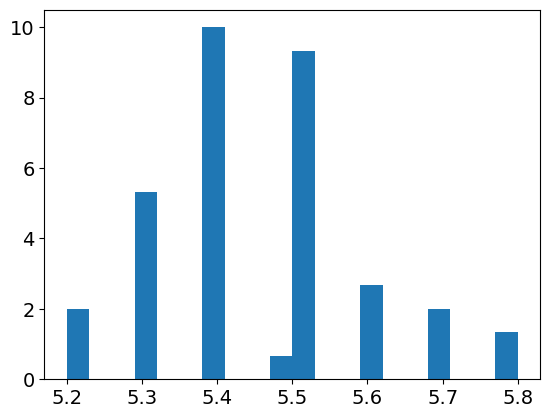

In [24]:
plt.hist(fitness_hist, density=True, bins=20)